# Ultimate Technologies: Part 3 - Modeling

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## Load Data Set
Load the preprocessed dataset.

In [2]:
df = pd.read_csv('./data/processed_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  int64  
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   active                  50000 non-null  int64  
 9   days_since_signup_date  50000 non-null  int64  
 10  city_King's Landing     50000 non-null  int64  
 11  city_Winterfell         50000 non-null  int64  
 12  phone_iPhone            50000 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 5.0 MB


## Features and Labels
Select the features and labels.

In [4]:
X = df.drop(columns=['active']).values
y = df['active'].values

In [5]:
X.shape

(50000, 12)

In [6]:
y.shape

(50000,)

## Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Rescaling
Rescale the training and test features to values between 0 and 1.

In [8]:
scaler = MinMaxScaler().fit(X_train)
X_train_rescaled = scaler.transform(X_train)
X_test_rescaled = scaler.transform(X_test)

## Logistic Regression Model
For this dataset, I will use a logistic regression model to predict whether a user is active or not.

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train_rescaled, y_train)

LogisticRegression()

In [10]:
y_pred = logreg.predict(X_test_rescaled)

### Model Evaluation

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      9507
           1       0.67      0.49      0.57      5493

    accuracy                           0.73     15000
   macro avg       0.71      0.68      0.68     15000
weighted avg       0.72      0.73      0.71     15000



### Feature Importance

In [12]:
model_coefficients = logreg.coef_[0]

In [13]:
features = df.drop(columns=['active']).columns.tolist()

In [14]:
feature_importance = pd.DataFrame({'feature': features, 'importance': model_coefficients})

In [15]:
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.index = np.arange(len(feature_importance))

In [16]:
feature_importance

,feature,importance
0,trips_in_first_30_days,8.182265
1,city_King's Landing,1.784972
2,phone_iPhone,1.101179
3,ultimate_black_user,0.901084
4,city_Winterfell,0.562687
5,surge_pct,0.334517
6,days_since_signup_date,0.223096
7,weekday_pct,0.075678
8,avg_rating_of_driver,-0.484460
9,avg_rating_by_driver,-0.694555


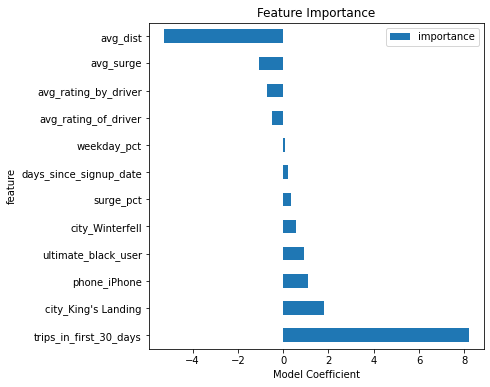

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
feature_importance.plot.barh(x='feature', ax=ax)
ax.set_xlabel('Model Coefficient')
ax.set_title('Feature Importance')
plt.show()

## Summary
During EDA, I determined that 37% of the drivers are active, which is a low retention rate.

**Goal:** 

The goal of this project was to determine if a rider will be active in their six month or not. 

**Modeling Approach:**

To answer this question, I chose to create two groups, those that are active (have traveled in the last 30 days) and those that are not. Thus, I created a classification problem. I decide on logistic regression as a simple way to create a predictive model to answer the goal of the project.

**Results:**

The model achieved an accuracy of 73%, with an F1-score of 0.80 on the majority class (in active drivers) and and F1-score of 0.57 on the minority class (active drivers). The large difference in F1-scores is most likely due to class imbalance issues.

**Feature Importance:**

From the model coefficients, I could assess the importance of the features in the model fit. I determined that whether a driver is active is strongly negatively related to the average distance the driver has gone. While, if a driver has made a trip in the first 30 days, it is strongly likely that is driver will be active in the future.

**Recommendations:**

As part of a new sign-up process, I would recommend that Ultimate Technologies gives riders and insentive to take a trip within their first month as members. This seems to be the strongest indicator of rider retention.